<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

arquivo= 'estados-bruto.xml'

fonte = BeautifulSoup(open(arquivo,'r'), 'html.parser')

/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [ ]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?>
<estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla>
<regiao>S

In [ ]:
# manipule os dados
dic_arquivo = {
    'Estado':[],
    'Sigla':[],
    'Regiao':[]
}
estados = fonte.find_all('estado')
for estado in estados:
    nome = estado.find('nome').text
    sigla = estado.find('sigla').text
    regiao = estado.find('regiao').text

    print(nome,sigla,regiao)
    dic_arquivo['Estado'].append(nome)
    dic_arquivo['Sigla'].append(sigla)
    dic_arquivo['Regiao'].append(regiao)
# continue o codigo aqui

ACRE AC NORTE
ALAGOAS AL NORDESTE
AMAPA AP NORTE
AMAZONAS AM NORTE
BAHIA BA NORDESTE
CEARA CE NORDESTE
DISTRITO FEDERAL DF CENTRO-OESTE
ESPIRITO SANTO ES SUDESTE
GOIAS GO CENTRO-OESTE
MARANHAO MA NORDESTE
MATO GROSSO MT CENTRO-OESTE
MATO GROSSO DO SUL MS CENTRO-OESTE
PARA PA NORTE
PARAIBA PB NORDESTE
PARANA PR SUL
PERNAMBUCO PE NORDESTE
PIAUI PI NORDESTE
RIO DE JANEIRO RJ SUDESTE
RIO GRANDE DO NORTE RN NORDESTE
RIO GRANDE DO SUL RS SUL
RONDONIA RO NORTE
RORAIMA RR NORTE
SANTA CATARINA SC SUL
SAO PAULO SP SUDESTE
SERGIPE SE NORDESTE
TOCANTINS TO NORTE
MINAS GERAIS MG SUDESTE


In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import pandas as pd

estados_df = pd.DataFrame(dic_arquivo)

estados_df.to_csv('estados-limpo.csv',sep=';',index=False)



# continue o codigo aqui

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

nome_arquivo = 'cidades-bruto.csv'

fonte_df = pd.read_csv(nome_arquivo)

In [ ]:
# visualize os resultados
fonte_df
# continue o codigo aqui

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [ ]:
# manipule os dados
novo_arquivo_df = fonte_df[['UF','nome','Pop_est_2009','PIB','PIB_percapita']]
# continue o codigo aqui
novo_arquivo_df = novo_arquivo_df.rename(columns={'UF':'Estado','nome':'cidade','Pop_est_2009':'populacao'})

In [ ]:
novo_arquivo_df

,Estado,cidade,populacao,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5563,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;





novo_arquivo_df.to_csv('cidades-limpo.csv',sep=';',index=False)

# continue o codigo aqui

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
novo_arquivo_df['Estado']= novo_arquivo_df['Estado'].apply(lambda x:x.replace('Ã','A'))
estados_df['Estado']= estados_df['Estado'].apply(lambda x:x.replace('Ã','A'))

In [ ]:
# solução do exercício 1.3
brasil_limpo_df = pd.merge(left=novo_arquivo_df, right=estados_df, on='Estado', how='inner')

In [ ]:
brasil_limpo_df

,Estado,cidade,populacao,PIB,PIB_percapita,Sigla,Regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,2.355845e+04,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7893,7.499741e+04,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,9.290382e+04,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,19410,6.236689e+04,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
4074,RIO GRANDE DO NORTE,Frutuoso Gomes,4468,2.023662e+04,4529.240234,RN,NORDESTE
4075,RIO GRANDE DO NORTE,Jaçanã,8045,3.376264e+04,4196.720215,RN,NORDESTE
4076,RIO GRANDE DO NORTE,São Miguel do Gostoso,9240,4.802487e+04,5197.500000,RN,NORDESTE
4077,RIO GRANDE DO NORTE,Nísia Floresta,24109,1.209326e+05,5016.080078,RN,NORDESTE


In [ ]:
brasil_limpo_df.isnull().any()

Estado           False
cidade            True
populacao        False
PIB              False
PIB_percapita    False
Sigla            False
Regiao           False
dtype: bool

In [ ]:
brasil_limpo_df =brasil_limpo_df.fillna('')

In [ ]:
brasil_limpo_df.isnull().any()

Estado           False
cidade           False
populacao        False
PIB              False
PIB_percapita    False
Sigla            False
Regiao           False
dtype: bool

In [ ]:
brasil_limpo_df.to_csv('brasil.csv',sep=';',index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1
brasil_df = pd.read_csv('brasil.csv',delimiter=';')

In [ ]:
brasil_df

,Estado,cidade,populacao,PIB,PIB_percapita,Sigla,Regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,2.355845e+04,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7893,7.499741e+04,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,9.290382e+04,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,19410,6.236689e+04,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
4074,RIO GRANDE DO NORTE,Frutuoso Gomes,4468,2.023662e+04,4529.240234,RN,NORDESTE
4075,RIO GRANDE DO NORTE,Jaçanã,8045,3.376264e+04,4196.720215,RN,NORDESTE
4076,RIO GRANDE DO NORTE,São Miguel do Gostoso,9240,4.802487e+04,5197.500000,RN,NORDESTE
4077,RIO GRANDE DO NORTE,Nísia Floresta,24109,1.209326e+05,5016.080078,RN,NORDESTE


In [ ]:
brasil_df = brasil_limpo_df

In [ ]:
brasil_df

,Estado,cidade,populacao,PIB,PIB_percapita,Sigla,Regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,2.355845e+04,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7893,7.499741e+04,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,9.290382e+04,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,19410,6.236689e+04,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
4074,RIO GRANDE DO NORTE,Frutuoso Gomes,4468,2.023662e+04,4529.240234,RN,NORDESTE
4075,RIO GRANDE DO NORTE,Jaçanã,8045,3.376264e+04,4196.720215,RN,NORDESTE
4076,RIO GRANDE DO NORTE,São Miguel do Gostoso,9240,4.802487e+04,5197.500000,RN,NORDESTE
4077,RIO GRANDE DO NORTE,Nísia Floresta,24109,1.209326e+05,5016.080078,RN,NORDESTE


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta
brasil_df.nlargest(10,'populacao')[['cidade','Estado','populacao']]

,cidade,Estado,populacao
2665,São Paulo,SAO PAULO,11037593
3492,Rio de Janeiro,RIO DE JANEIRO,6186710
44,Salvador,BAHIA,2998056
4078,Brasília,DISTRITO FEDERAL,2606885
1736,Belo Horizonte,MINAS GERAIS,2452617
2891,Manaus,AMAZONAS,1738641
1969,Recife,PERNAMBUCO,1561659
501,Porto Alegre,RIO GRANDE DO SUL,1436123
2617,Guarulhos,SAO PAULO,1299283
2734,Campinas,SAO PAULO,1064669


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta
brasil_df.query('Regiao == "NORDESTE"').nsmallest(5,'PIB_percapita')[['cidade','Estado','PIB_percapita']]

,cidade,Estado,PIB_percapita
3451,São Vicente Ferrer,MARANHAO,1929.969971
3346,Cajapió,MARANHAO,2203.830078
69,Lamarão,BAHIA,2327.149902
3471,Timbiras,MARANHAO,2368.159912
3367,Axixá,MARANHAO,2416.969971


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta
brasil_df.query('Estado == "SAO PAULO"').nlargest(15,'PIB')[['cidade','Estado','PIB']]

,cidade,Estado,PIB
2665,São Paulo,SAO PAULO,389317152.0
2617,Guarulhos,SAO PAULO,32473828.0
2734,Campinas,SAO PAULO,31654720.0
2499,Osasco,SAO PAULO,31616452.0
2202,São Bernardo do Campo,SAO PAULO,28935768.0
2738,Barueri,SAO PAULO,26908070.0
2159,Santos,SAO PAULO,22546134.0
2386,São José dos Campos,SAO PAULO,22018042.0
2406,Jundiaí,SAO PAULO,16585137.0
2208,Santo André,SAO PAULO,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
# código para responder a pergunta
brasil_df.query('Estado == "SANTA CATARINA"')['PIB'].sum()

129806256.75195317

 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta
brasil_df.query('Regiao == "SUL"')['populacao'].sum()

17032871

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta
brasil_df.query('Estado == "MATO GROSSO DO SUL"')['PIB_percapita'].agg('mean')

14458.896859975644

 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta
brasil_df['populacao'].sum()

149864203

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: xlabel='cidade'>

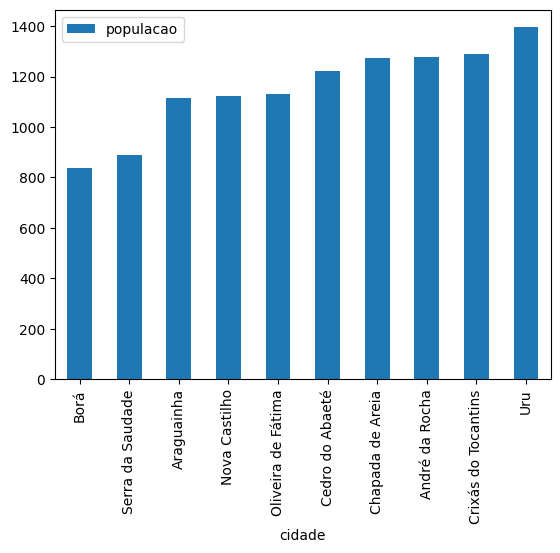

In [ ]:
# código para gerar a visualização
menos_populosa=brasil_df.nsmallest(10,'populacao')[['cidade','Estado','populacao','Sigla']]
menos_populosa.plot(kind='bar',x='cidade',y='populacao')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: ylabel='populacao'>

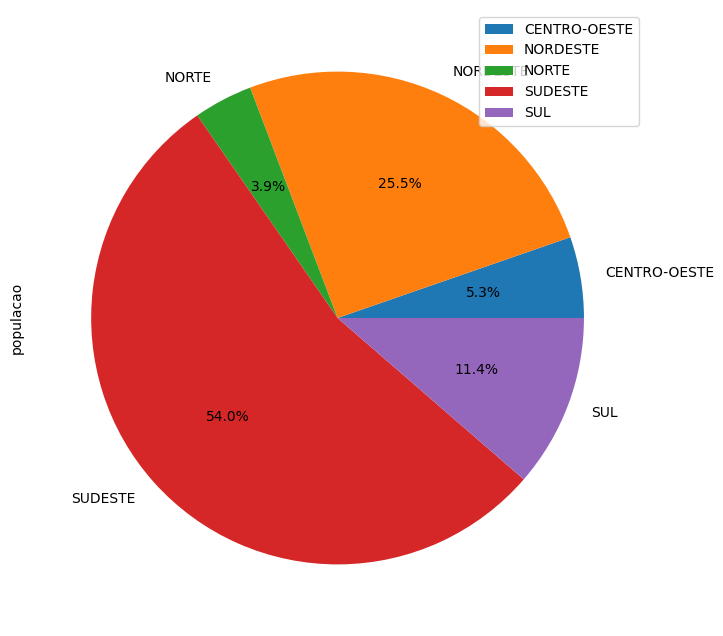

In [ ]:
# código para gerar a visualização
brasil_df[['Regiao', 'populacao']].groupby('Regiao').agg('sum').plot.pie(y='populacao',autopct='%1.1f%%', figsize=(9,8))